### Анализ бизнес показателей интернет компании.

**Цель исследования**:
1. Выявить рекламный канал, принёсший больше всего дохода за всё время;
2. Вычислить изменение среднего чека транзакции после введения коронавирусных ограничений, а также для пользователей, покупающих с промокодом и без;
3. Проверить гипотезу: "Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?";
4. Cпрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой на полгода вперед.

**Ход исследования**

Проведем предобработку данных. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных.

Затем посчитаем доход от каждого рекламного источника и выявим наиболее доходный.

Далее поделим общий доход на количество транзакций, чтобы получить средний чек транзакции. Покажем измение до и после введения коронавирусных ограничений, а также для пользователей, покупающих с промокодом и без.

Затем проверим гипотезу. Для этого сформулируем нулевую и альтернативную гипотезы. Чтобы подтвердить или опровергнуть нулевую гипотезу проведем тест Манна-Уитни для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам.

В конце напишем общий вывод.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Предобработка данных.
 3. Поиск рекламного канала, принесшего наибольший доход за все время.
 4. Вычисление изменения среднего чека транзакции после введения коронавирусных ограничений, а также для пользователей, покупающих с промокодом и без.
 5. Проверка гипотезы.
 6. Прогнозирование объема дохода, полученного с пользователей, приведенных на сайт контекстной рекламой на полгода вперед.
 7. Общий вывод.

### Анализ бизнес показателей интернет компании.
_____

###### Данное исследование разделим на несколько частей.

#### Часть 1. Изучение данных из файла и предобработка данных:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек, предобработка данных.](#1-bullet)
#### Часть 2. Поиск рекламного канала, принесшего наибольший доход за все время:
* [1. Поиск рекламного канала, принесшего наибольший доход за все время.](#2-bullet)
#### Часть 4. Вычисление изменения среднего чека транзакции:
* [1. Изменения среднего чека транзакции после введения коронавирусных ограничений.](#3-bullet)
* [2. Изменения среднего чека транзакции для пользователей, покупающих с промокодом и без, после введения коронавирусных ограничений.](#4-bullet)
#### Часть 5. Проверка гипотезы:
* [1. Проверка гипотезы.](#5-bullet)
#### Часть 6. Прогнозирование объема дохода:
* [1. Прогнозирование объема дохода, полученного с пользователей, приведенных на сайт контекстной рекламой на полгода вперед.](#6-bullet)
##### Итоги исследования

## Изучение данных из файла и предобработка данных.

<a id='1-bullet'></a>
### Изучение файлов с данными, получение общей информации, загрузка библиотек, предобработка данных.

In [1]:
import pandas as pd #импорт библиотеки pandas
import datetime  #импорт библиотеки datetime
from scipy import stats as st
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Загрузим датасет для анализа данных.

In [2]:
def primary(data):
    display(data.info())
    display(data.head())
    display('Проверка на пропуски:',data.isna().sum())
    display('Проверка на дубликаты:',data.duplicated().sum()) 
    # фукция получения общей информации, первых пяти строк таблицы, проверки на пропуски и дубликаты

In [3]:
camp = pd.read_csv("D:\\Programs\\summer_camp_data.csv", parse_dates=['date'])

In [4]:
primary(camp) # применение функции

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52721 entries, 0 to 52720
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52721 non-null  datetime64[ns]
 1   source              52721 non-null  object        
 2   medium              52721 non-null  object        
 3   delivery_available  52721 non-null  object        
 4   device_type         52721 non-null  object        
 5   promo_activated     52721 non-null  object        
 6   filter_used         52721 non-null  object        
 7   pageviews           52721 non-null  int64         
 8   visits              52721 non-null  int64         
 9   productClick        52721 non-null  int64         
 10  addToCart           52721 non-null  int64         
 11  checkout            52721 non-null  int64         
 12  transactions        52721 non-null  int64         
 13  revenue             52721 non-null  float64   

None

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


'Проверка на пропуски:'

date                  0
source                0
medium                0
delivery_available    0
device_type           0
promo_activated       0
filter_used           0
pageviews             0
visits                0
productClick          0
addToCart             0
checkout              0
transactions          0
revenue               0
dtype: int64

'Проверка на дубликаты:'

0

Явных дубликатов и пропусков не обнаружено. Столбец `date` был преобразован в тип данных `datetime`. 

In [5]:
camp['promo_activated'].unique()

array(['no', 'yes'], dtype=object)

In [6]:
camp['filter_used'].unique()

array(['no', 'yes'], dtype=object)

В столбцах `promo_activated` и `filter_used` можно изменить тип данных на `boolean`.

In [7]:
for x, y in ('no', False), ('yes',True):
    camp['promo_activated'] = camp['promo_activated'].replace(x, y) #замена значений 

In [8]:
for x, y in ('no', False), ('yes',True):
    camp['filter_used'] = camp['filter_used'].replace(x, y) #замена значений

Теперь проверим столбцы `source`, `medium`, `delivery_available`, `device_type` на неявные дулбикаты.

In [9]:
camp['source'].sort_values().unique() # Проверка на неявные дубликаты

array(['(direct)', 'DuckDuckGo', 'actionpay', 'admitad', 'advertise',
       'baidu', 'bing', 'cityads', 'co-promo', 'eLama', 'exponea',
       'facebook', 'google', 'instagram', 'mytarget', 'newsletter',
       'opmcpa', 'other', 'promo', 'sailplay', 'vk', 'yandex',
       'yandex_direct', 'youtube'], dtype=object)

In [10]:
camp['medium'].sort_values().unique() # Проверка на неявные дубликаты

array(['(none)', 'cpa', 'cpc', 'email', 'organic', 'social'], dtype=object)

In [11]:
camp['delivery_available'].sort_values().unique() # Проверка на неявные дубликаты

array(['Доставка есть', 'Доставки нет', 'Не определено'], dtype=object)

In [12]:
camp['device_type'].sort_values().unique() # Проверка на неявные дубликаты

array(['Десктоп', 'Мобайл', 'Не определено'], dtype=object)

Необходимо заменить значение `(none)` в столбце `medium` на пропуски.

In [13]:
camp['medium'] = camp['medium'].replace('(none)', None)

#### Вывод

Столбцы приведены к необходимым типам данных. Явных дубликатов и пропусков не обнаружено. Данные готовы к анализу.

## Поиск рекламного канала, принесшего наибольший доход за все время.

<a id='2-bullet'></a>
### Поиск рекламного канала, принесшего наибольший доход за все время.

Для нахождения рекламного канала можно построить график, по которому можно определить наиболее доходный.

<AxesSubplot:title={'center':'Доход рекламных каналов'}, xlabel='Канал', ylabel='Доход'>

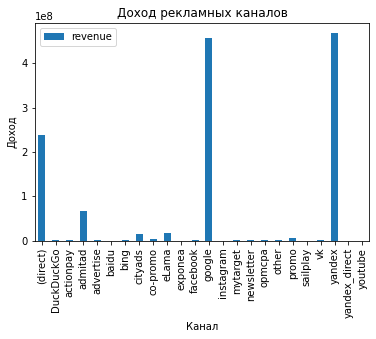

In [14]:
camp.groupby('source').sum().reset_index().plot(
    x='source',
    y='revenue',
    kind='bar',
    title='Доход рекламных каналов',
    xlabel='Канал',
    ylabel='Доход')

Также рекламный канал можно найти используя код

In [15]:
camp.groupby('source').sum().sort_values(by='revenue',ascending= False).reset_index().loc[0,'source']

'yandex'

#### Вывод

`Yandex` - рекламный источник, принесший наибольший доход.

## Вычисление изменения среднего чека транзакции.

<a id='3-bullet'></a>
### Изменение среднего чека транзакции после введения коронавирусных ограничений.

Дата введения коронавирусных ограничений - `2020-03-30`. Для нахождения среднего чека поделим общий доход на количество транзаций. Найдем средний чек транзакции для периода до введения ограничений и после. Затем сравним два этих показателя

In [16]:
round(
    (
        (
            camp.query('date >= "2020-03-30"')["revenue"].sum() #нахождение общего дохода до введения коронавирусных ограничений
            / camp.query('date >= "2020-03-30"')["transactions"].sum() #нахождение количества транзакций до введения коронавирусных ограничений
        ) # определение среднего чека транзакции
        / (
            camp.query('date < "2020-03-30"')["revenue"].sum()  #нахождения общего дохода после введения коронавирусных ограничений
            / camp.query('date < "2020-03-30"')["transactions"].sum() #нахождения количества транзакций после введения коронавирусных ограничений
        ) # определение среднего чека транзакции
        - 1
    )
    * 100, # определение изменения среднего чека транзакции
    2,
)

-7.41

Средний чек транзакции упал на 7.41 процента

<a id='4-bullet'></a>
### Изменение среднего чека транзакции для пользователей, покупающих с промокодом и без, после введения коронавирусных ограничений.

In [17]:
round(
    (
        (
            camp.query('date >= "2020-03-30" and promo_activated == True')["revenue"].sum() #нахождение общего дохода до введения коронавирусных ограничений
            / camp.query('date >= "2020-03-30" and promo_activated == True')["transactions"].sum() #нахождение количества транзакций до введения коронавирусных ограничений
        ) # определение среднего чека транзакции
        / (
            camp.query('date < "2020-03-30" and promo_activated == True')["revenue"].sum()  #нахождения общего дохода после введения коронавирусных ограничений
            / camp.query('date < "2020-03-30" and promo_activated == True')["transactions"].sum() #нахождения количества транзакций после введения коронавирусных ограничений
        ) # определение среднего чека транзакции
        - 1
    )
    * 100, # определение изменения среднего чека транзакции
    2,
)

-5.19

Средний чек тразакции пользователей, покупающих с промокодом, уменьшился на 5.19 процента.

In [18]:
round(
    (
        (
            camp.query('date >= "2020-03-30" and promo_activated == False')["revenue"].sum() #нахождение общего дохода до введения коронавирусных ограничений
            / camp.query('date >= "2020-03-30" and promo_activated == False')["transactions"].sum() #нахождение количества транзакций до введения коронавирусных ограничений
        ) # определение среднего чека транзакции
        / (
            camp.query('date < "2020-03-30" and promo_activated == False')["revenue"].sum()  #нахождения общего дохода после введения коронавирусных ограничений
            / camp.query('date < "2020-03-30" and promo_activated == False')["transactions"].sum() #нахождения количества транзакций после введения коронавирусных ограничений
        ) # определение среднего чека транзакции
        - 1
    )
    * 100, # определение изменения среднего чека транзакции
    2,
)

-9.74

Средний чек тразакции пользователей, покупающих без промокода, уменьшился на 9.74 процента.

#### Вывод

Средний чек транзакции уменьшился после введения коронавирусных ограничений на 7.41 процента. Также он уменьшился, как для пользователей, использовавших промокод, так и для тех, кто его не использовал, на 5.19 и 9.74 процента соотвественно.

## Проверка гипотезы

<a id='5-bullet'></a>
### Проверка гипотезы.

Необходимо проверить гипотезу: "Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?"

Нулевая гипотеза будет выглядеть следующим образом: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Чтобы подтвердить или опровергнуть нулевую гипотезу проведем статистический тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. В данном случае, уровень значимости равен 0,05, так как мы говорим о 95% уверенности.

Для начала определим коэффициент конверсии в транзакцию.

In [19]:
camp_tcr = camp.copy()

In [20]:
camp_tcr['TCR'] = camp_tcr['transactions']/camp_tcr['visits']

Далее определим дни недели для каждой даты

In [21]:
camp_tcr['weekday'] = camp_tcr['date'].apply(lambda x: datetime.datetime.strftime(x, '%A'))

Далее определим нормально ли распределены выборки. Для этого воспользуемся тестом Шапиро.

In [22]:
weekday = camp_tcr.query('weekday != "Saturday" and weekday != "Sunday"')

In [23]:
weekends = camp_tcr.query('weekday == "Saturday" or weekday == "Sunday"')

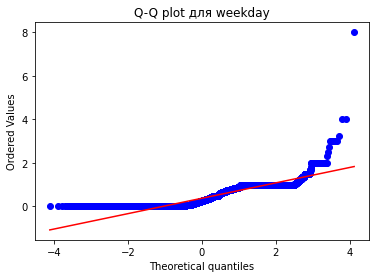

In [24]:
fig, ax = plt.subplots()
st.probplot(weekday['TCR'], plot=ax)
ax.set_title('Q-Q plot для weekday')
plt.show()

In [25]:
stat, p = st.shapiro(weekday['TCR'])
print('Статистика теста:', stat, 'p-value:', p)

if p > 0.05:
    print('Выборка имеет нормальное распределение')
else:
    print('Выборка не имеет нормальное распределение')

Статистика теста: 0.8359201550483704 p-value: 0.0
Выборка не имеет нормальное распределение


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


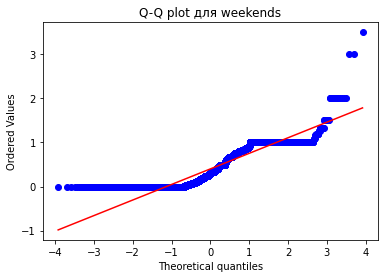

In [26]:
fig, ax = plt.subplots()
st.probplot(weekends['TCR'], plot=ax)
ax.set_title('Q-Q plot для weekends')
plt.show()

In [27]:
stat, p = st.shapiro(weekends['TCR'])
print('Статистика теста:', stat, 'p-value:', p)

if p > 0.05:
    print('Выборка имеет нормальное распределение')
else:
    print('Выборка не имеет нормальное распределение')

Статистика теста: 0.8567774295806885 p-value: 0.0
Выборка не имеет нормальное распределение


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Так как выборки не имеют нормального распределения, то для сравнения двух выборок стоит применить тест Манна-Уитни.

In [28]:
stat, p = st.mannwhitneyu(weekends['TCR'], weekday['TCR'])

# Оцениваем статистическую значимость различий между выборками
if p > 0.05:
    print('Различия между выборками не являются статистически значимыми')
else:
    print('Различия между выборками статистически значимы')

Различия между выборками статистически значимы


Отсюда, можно с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни.

In [29]:
round((weekends["TCR"].mean() / weekday["TCR"].mean() - 1) * 100, 2)

6.34

Это подтверждается также разностью в средних значениях. Они различны на 6.34 процента.

При уровне значимости в 0.05 есть риск получить ложноположительный результат при множественной проверке гипотез. Поэтому следует понизить уровень значимости. Далее изменим уровень значимости до 0.01.

In [30]:
stat, p = st.mannwhitneyu(weekends['TCR'], weekday['TCR'])

# Оцениваем статистическую значимость различий между выборками
if p > 0.01:
    print('Различия между выборками не являются статистически значимыми')
else:
    print('Различия между выборками статистически значимы')

Различия между выборками статистически значимы


#### Вывод

Можно с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни. Это также подтверждается и при уровне значимости 0.01. Средние значения также различны между собой. В выходные дни коэффициент конверсии в транзакцию больше на 6.34 процента, чем в будние дни.

## Прогнозирование объема дохода.

<a id='6-bullet'></a>
### Прогнозирование объема дохода, полученного с пользователей, приведенных на сайт контекстной рекламой на полгода вперед

 Для получения прогноза на 6 месяцев вперед на основе временного ряда можно использовать модель SARIMA.

In [31]:
cpc_df = camp[camp['medium'] == 'cpc'].groupby('date').sum() #фильтрация датафрейма по значению 'cpc' в столбце 'medium

In [32]:
cpc_revenue = cpc_df[ 'revenue'] #cоздание нового датафрейма только с датой и доходом

In [33]:
train = cpc_revenue[:-1]  # Все данные, кроме последней точки
test = cpc_revenue[-1:]   # Только последняя точка

In [34]:
model = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
forecast = model.forecast(steps=182)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


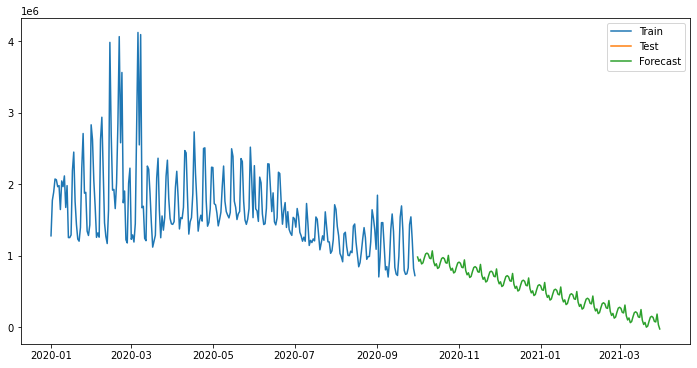

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pd.date_range(start='2020-10-01', periods=182, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()


Таким образом, можно спрогнозировать падение дохода через полгода.

## Вывод.

В ходе проведенного исследования были достигнуты следующие результаты:

Наибольший доход был получен от рекламного источника Yandex, что позволяет сделать вывод о его эффективности и рекомендовать его использование для привлечения новых пользователей.

После введения коронавирусных ограничений средний чек транзакции снизился на 7.41%. Это свидетельствует о том, что ограничения оказали негативное влияние на потребительскую активность. Снижение среднего чека было отмечено как среди пользователей, использовавших промокоды (-5.19%), так и среди тех, кто покупал без них (-9.74%).

Была проверена гипотеза о различии коэффициента конверсии в транзакцию (CR) между выходными и будними днями. С 95% уверенностью можно утверждать, что CR в выходные дни отличается от будних дней. Более того, это подтверждается и при уровне значимости 0.01. В выходные дни коэффициент конверсии в транзакцию выше на 6.34 процента, чем в будние дни.

Прогнозирование дохода на полгода вперед показало, что следует ожидать снижения дохода от пользователей, привлеченных контекстной рекламой.

В свете полученных результатов, рекомендуется уделить внимание повышению эффективности рекламных кампаний, оптимизации маркетинговых затрат и адаптации бизнес-модели к изменяющимся условиям после введения коронавирусных ограничений. Особое внимание стоит уделить анализу поведения пользователей в выходные дни, когда коэффициент конверсии в транзакцию выше, для выявления возможных резервов роста.